In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

# Point Estimates (Application de la Loi des Grands Nombres)

### Simulation de la distribution des âges

In [2]:
np.random.seed(10)

# on décrit la distribution des âges comme une mixture de 2 lois de Poisson

population_ages1 = stats.poisson.rvs(loc=18, # on fait démarrer la distribution à 18 ans
                                     mu=35, # moyenne à 18 + 35 ans
                                     size=150000) # 150k échantillons
population_ages2 = stats.poisson.rvs(loc=18,
                                     mu=10, 
                                     size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

### Echantillonage 

In [3]:
np.random.seed(6)

sample_ages = np.random.choice(a=population_ages,
                               size=500) # 500 échantillons

print(sample_ages.mean()) # moyenne empirique

population_ages.mean() - sample_ages.mean()

42.388


0.614372000000003

# Théorème Central Limite

-0.12008483603917186


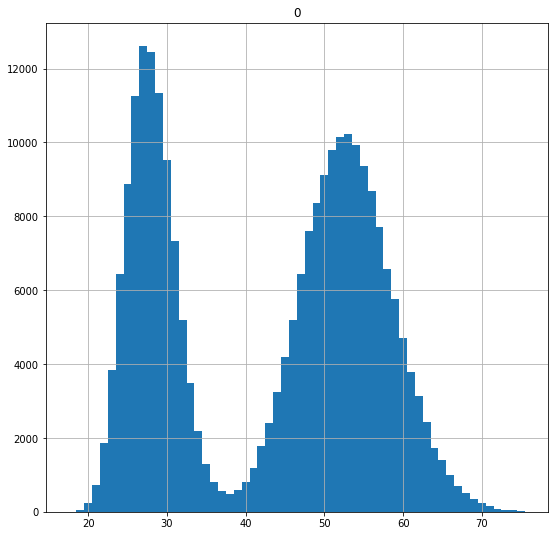

In [4]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print(stats.skew(population_ages)) # Niveau de dissymétrie

-0.056225282585406065


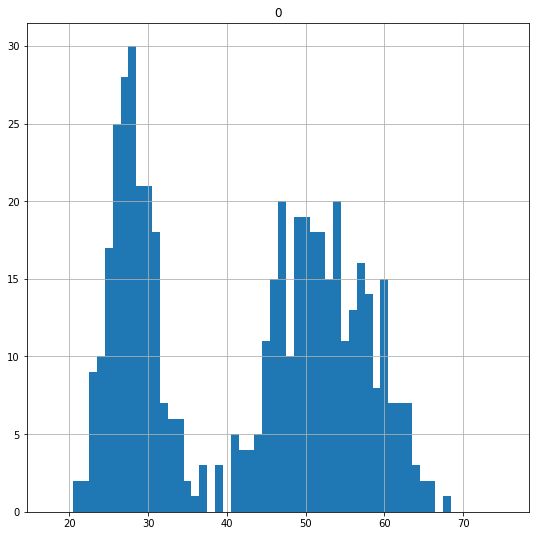

In [5]:
pd.DataFrame(sample_ages).hist(bins=58,
                               range=(17.5,75.5),
                               figsize=(9,9))

print(stats.skew(sample_ages))

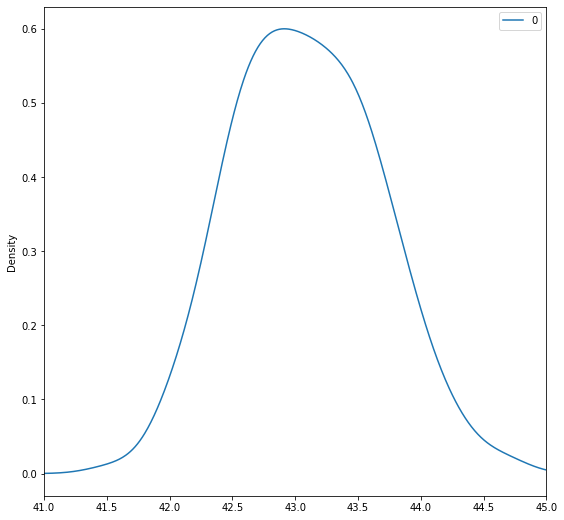

In [6]:
np.random.seed(10)

point_estimates = [] # on crée une liste avec les points estimates

for x in range(200): # Générons 200 moyennes
    sample = np.random.choice(a=population_ages, 
                              size=500)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density", # Dessinons la densité de proba obtenue
                                   figsize=(9,9),
                                   xlim=(41,45))

In [7]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

# Intervalles de confiance

### Si on connaît l'écart type de la population

0) Théorie : La "z-statistique" = x_mean - mu / (std / sqrt(N)) suit une gaussienne centrée réduite

1) On choisit un risque qu'on note alpha, typiquement alpha = 0.05 pour avoir un taux de confiance de 1 - alpha = 95%

2) On en déduit une valeur z_critique qui correspond à la valeur telle que 95% des valeurs tirées selon une gaussienne centrée réduite sont dans l'intervalle [-z_c, z_c]  

In [9]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a=population_ages, size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # valeur critique à 97,5% à droite car il y a les 2 côtés de la gaussienne

print("z-critical value:")
print(z_critical)                        

pop_stdev = population_ages.std()  # Ecart type de la population

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.70306406882683, 43.34293593117317)


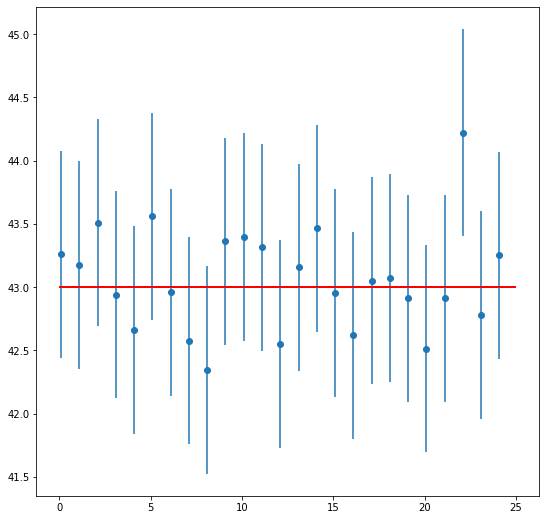

In [10]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")

### Si on connaît pas l'écart type de la population

0) Théorie : Cette fois ci on ne connaît pas l'écart type de la population. La "t-statistique" = x_mean - mu / (std_emp / sqrt(N)) suit une loi de Student (T distribution)

1) On calcule alors l'écart type empirique : std_mean = sqrt(sum((x - x_mean)^2)/(N - 1)))

2) On choisit un risque qu'on note alpha, typiquement alpha = 0.05 pour avoir un taux de confiance de 1 - alpha = 95%

3) On en déduit une valeur t_critique qui correspond à la valeur telle que 95% des valeurs tirées selon une gaussienne centrée réduite sont dans l'intervalle [-t_c, t_c]  

In [12]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)

print("t-critical value:")
print(t_critical)                        

sample_stdev = sample.std(ddof=1)

sigma = sample_stdev/math.sqrt(sample_size)
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)



t-critical value:
2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


In [45]:
stats.t.interval(alpha = 0.99,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(39.88992253789557, 45.87007746210443)

# Hypothesis Testing

### One Sample T-Test

In [32]:
np.random.seed(6)

idf_ages1 = stats.poisson.rvs(loc=18, mu=30, size=60)
idf_ages2 = stats.poisson.rvs(loc=18, mu=10, size=40)
idf_ages = np.concatenate((idf_ages1, idf_ages2))

print(population_ages.mean())
print(idf_ages.mean())

43.002372
40.25


In [33]:
stats.ttest_1samp(a=idf_ages, # sample mean
                  popmean=population_ages.mean())  # pop mean

Ttest_1sampResult(statistic=-2.5616828573580896, pvalue=0.0119245670424704)

In [36]:
sigma = idf_ages.std()/math.sqrt(100)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 99,                     # Degrees of freedom
                 loc = idf_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(38.128766281320196, 42.371233718679804)

In [38]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 99,                     # Degrees of freedom
                 loc = idf_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(37.44223252841739, 43.05776747158261)

### Two-Sample T-Test

In [39]:
np.random.seed(12)
paca_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
paca_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
paca_ages = np.concatenate((paca_ages1, paca_ages2))

print(paca_ages.mean())

42.8


In [40]:
stats.ttest_ind(a=idf_ages,
                b=paca_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.395867179694805, pvalue=0.1658273740944619)

### Paired T-Tests

In [41]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [42]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

# Next time : ANOVA, Chi 2, Linear Regression

# One-way Anova (Analysis of Variance)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
np.random.seed(12)

regions =   ["idf","paca","bretagne","occit","normandie"]

# Generate random data
voter_region = np.random.choice(a=regions,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by region
voter_frame = pd.DataFrame({"region":voter_region,"age":voter_age})
groups = voter_frame.groupby("region").groups

# Etract individual groups
idf = voter_age[groups["idf"]]
paca = voter_age[groups["paca"]]
bretagne = voter_age[groups["bretagne"]]
occit = voter_age[groups["occit"]]
normandie = voter_age[groups["normandie"]]

# Perform the ANOVA
stats.f_oneway(idf, paca, bretagne, occit, normandie)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [3]:
np.random.seed(12)

regions =   ["idf","paca","bretagne","occit","normandie"]

# Generate random data
voter_region = np.random.choice(a=regions,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

idf_age = stats.poisson.rvs(loc=18,
                              mu=32,
                              size=1000)

voter_age = np.where(voter_region=="idf", idf_age, voter_age)

# Group age data by region
voter_frame = pd.DataFrame({"region":voter_region,"age":voter_age})
groups = voter_frame.groupby("region").groups

# Etract individual groups
idf = voter_age[groups["idf"]]
paca = voter_age[groups["paca"]]
bretagne = voter_age[groups["bretagne"]]
occit = voter_age[groups["occit"]]
normandie = voter_age[groups["normandie"]]

# Perform the ANOVA
stats.f_oneway(idf, paca, bretagne, occit, normandie)

F_onewayResult(statistic=4.880596362880081, pvalue=0.0006699349419590335)

In [6]:
# Get all region pairs
region_pairs = []

for region1 in range(4):
    for region2  in range(region1+1,5):
        region_pairs.append((regions[region1], regions[region2]))

# Conduct t-test on each pair
for region1, region2 in region_pairs: 
    print(region1, region2)
    print(stats.ttest_ind(voter_age[groups[region1]], 
                          voter_age[groups[region2]]))    

idf paca
Ttest_indResult(statistic=3.572320028184367, pvalue=0.0004489356841385033)
idf bretagne
Ttest_indResult(statistic=2.8187216947527585, pvalue=0.005158046124275502)
idf occit
Ttest_indResult(statistic=1.7452593522941884, pvalue=0.08427860685391288)
idf normandie
Ttest_indResult(statistic=4.220042299318638, pvalue=2.8515496054670062e-05)
paca bretagne
Ttest_indResult(statistic=-0.9779887872139286, pvalue=0.328687679434698)
paca occit
Ttest_indResult(statistic=-1.537940275215305, pvalue=0.12568427083007871)
paca normandie
Ttest_indResult(statistic=0.1754225782292794, pvalue=0.860801405242227)
bretagne occit
Ttest_indResult(statistic=-0.8181367221979297, pvalue=0.41394624196541574)
bretagne normandie
Ttest_indResult(statistic=1.5959271355589721, pvalue=0.11092241932285327)
occit normandie
Ttest_indResult(statistic=1.866874647450789, pvalue=0.06243863321791571)


# Chi 2

## Chi Squared Goodness of Fit

In [ ]:
"""

chi2 = sum((expected - observed)^2 / expected)

"""

In [9]:
pop1 = pd.DataFrame(["idf"]*100000 + ["bretagne"]*60000 +\
                        ["paca"]*50000 + ["occit"]*15000 + ["normandie"]*35000)
           

pop2 = pd.DataFrame(["idf"]*600 + ["bretagne"]*300 + \
                         ["paca"]*250 +["occit"]*75 + ["normandie"]*150)

pop1_table = pd.crosstab(index=pop1[0], columns="count")
pop2_table = pd.crosstab(index=pop2[0], columns="count")

print( "Pop 1")
print(pop1_table)
print(" ")
print( "Pop 2")
print(pop2_table)

Pop 1
col_0       count
0                
bretagne    60000
idf        100000
normandie   35000
occit       15000
paca        50000
 
Pop 2
col_0      count
0               
bretagne     300
idf          600
normandie    150
occit         75
paca         250


In [10]:
observed = pop2_table

pop1_ratios = pop1_table/len(pop1)  # Get population ratios

expected = pop1_ratios * len(pop2)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


In [11]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.00113047]


In [12]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

## Chi-Squared Test of Independence

In [13]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_region = np.random.choice(a= ["idf","paca","bretagne","occit","normandie"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_sport = np.random.choice(a= ["tennis","foot","rugby"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"region":voter_region, 
                       "sport":voter_sport})

voter_tab = pd.crosstab(voters.region, voters.sport, margins = True)

voter_tab.columns = ["tennis","foot","rugby","row_totals"]

voter_tab.index = ["idf","paca","bretagne","occit","normandie","col_totals"]

observed = voter_tab.ix[0:5,0:3]   # Get table without totals for later use
voter_tab

/Users/work/.local/share/virtualenvs/code-owXwZtpk/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/work/.local/share/virtualenvs/code-owXwZtpk/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,tennis,foot,rugby,row_totals
idf,50,94,107,251
paca,7,32,21,60
bretagne,96,212,189,497
occit,8,15,15,38
normandie,25,64,65,154
col_totals,186,417,397,1000


In [15]:
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.ix["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["tennis","foot","rugby"]
expected.index = ["idf","paca","bretagne","occit","normandie"]

expected

/Users/work/.local/share/virtualenvs/code-owXwZtpk/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,tennis,foot,rugby
idf,46.686,104.667,99.647
paca,11.160,25.020,23.820
bretagne,92.442,207.249,197.309
occit,7.068,15.846,15.086
normandie,28.644,64.218,61.138


In [16]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.169321280162059


In [17]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
15.50731305586545
P value
0.518479392948842


In [18]:
stats.chi2_contingency(observed= observed)

(7.169321280162059, 0.518479392948842, 8, array([[ 46.686, 104.667,  99.647],
        [ 11.16 ,  25.02 ,  23.82 ],
        [ 92.442, 207.249, 197.309],
        [  7.068,  15.846,  15.086],
        [ 28.644,  64.218,  61.138]]))

# Regression Linéaire

In [19]:
%matplotlib inline

In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [38]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.90e-08
Time:                        17:42:12   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [40]:
"""

y = a0 + a1 * x1 + a2 * x2 + eps

eps ~ N(0, eps^2)

"""

'\n\ny = a0 + a1 * x1 + a2 * x2 + eps\n\neps ~ N(0, eps^2)\n\n'